# Recorte de Sahpefiles

In [3]:
import os
from osgeo import ogr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Primero se hace el clip y la eliminacion de estructuras adicionales a la linea de costa

Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\10_octubre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\11_noviembre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\12_diciembre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\1_enero_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\2_febrero_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\3_marzo_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\4_abril_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\5_mayo_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSO

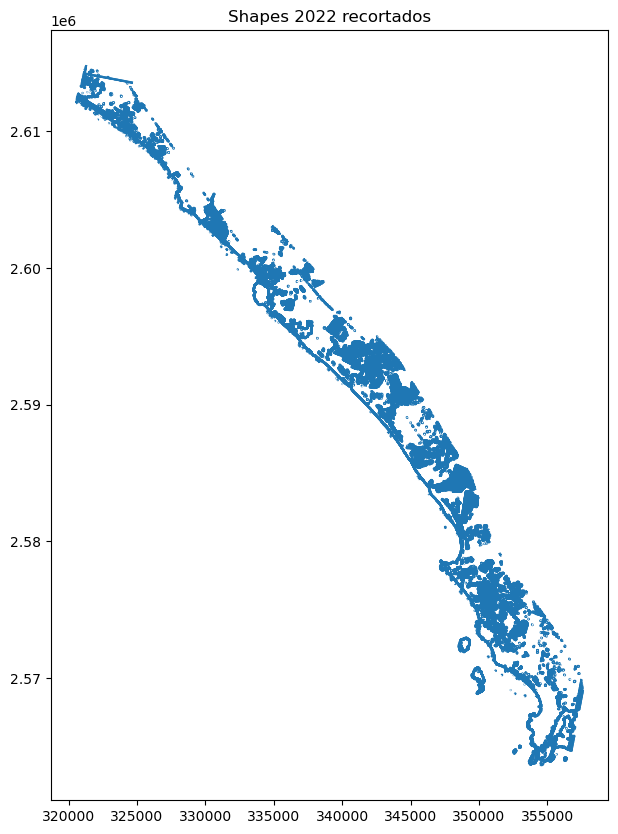

In [4]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Directorios base
base_dir = r'C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes'
clip_shapefile = os.path.join(base_dir, 'coastlinesh4326.shp')
input_base = os.path.join(base_dir, '2022shapes', 'input')
output_base = os.path.join(base_dir, '2022shapes', 'output')

# Crear carpeta de salida si no existe
os.makedirs(output_base, exist_ok=True)

# Leer el shapefile de recorte y reproyectar a 32613
clip_gdf = gpd.read_file(clip_shapefile).to_crs(epsg=32613)

# Lista para almacenar resultados
gdfs_clipped = []

# Procesar cada subcarpeta
for subfolder in os.listdir(input_base):
    subfolder_path = os.path.join(input_base, subfolder)
    if os.path.isdir(subfolder_path):
        # Buscar el primer shapefile en la subcarpeta
        shp_files = [f for f in os.listdir(subfolder_path) if f.endswith('.shp')]
        if not shp_files:
            print(f"No se encontró shapefile en {subfolder_path}")
            continue

        shp_path = os.path.join(subfolder_path, shp_files[0])
        gdf = gpd.read_file(shp_path)

        # Reproyectar a 32613
        gdf = gdf.to_crs(epsg=32613)

        # Hacer el clip
        clipped = gpd.overlay(gdf, clip_gdf, how='intersection')

        # Guardar con el nuevo nombre en la carpeta de output
        output_name = f"{subfolder}_2022_mz.shp"
        output_path = os.path.join(output_base, output_name)
        clipped.to_file(output_path)
        print(f"Guardado: {output_path}")

        # Guardar para la unión final
        gdfs_clipped.append(clipped)

# Unir todos los recortes
if gdfs_clipped:
    merged = gpd.GeoDataFrame(pd.concat(gdfs_clipped, ignore_index=True), crs="EPSG:32613")
    output_geojson = os.path.join(output_base, 'shapes_2022_mz.geojson')
    merged.to_file(output_geojson, driver="GeoJSON")
    print(f"GeoJSON final guardado en: {output_geojson}")

    # Visualizar
    merged.plot(figsize=(10,10))
    plt.title("Shapes 2022 recortados")
    plt.show()
else:
    print("No se generaron recortes.")


Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\10_octubre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\11_noviembre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\12_diciembre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\1_enero_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\2_febrero_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\3_marzo_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\4_abril_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\5_mayo_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSO

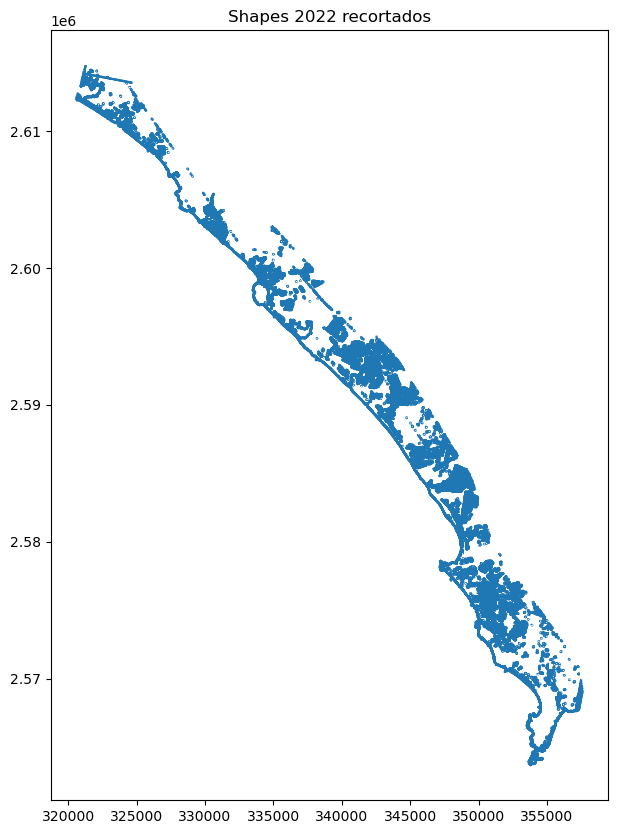

In [5]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Directorios base
base_dir = r'C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes'
clip_shapefile = os.path.join(base_dir, 'coastlinesh4326.shp')
input_base = os.path.join(base_dir, '2022shapes', 'input')
output_base = os.path.join(base_dir, '2022shapes', 'output')

# Crear carpeta de salida si no existe
os.makedirs(output_base, exist_ok=True)

# Leer el shapefile de recorte y reproyectar a 32613
clip_gdf = gpd.read_file(clip_shapefile).to_crs(epsg=32613)

# Lista para almacenar resultados
gdfs_clipped = []

# Procesar cada subcarpeta
for subfolder in os.listdir(input_base):
    subfolder_path = os.path.join(input_base, subfolder)
    if os.path.isdir(subfolder_path):
        # Buscar el primer shapefile en la subcarpeta
        shp_files = [f for f in os.listdir(subfolder_path) if f.endswith('.shp')]
        if not shp_files:
            print(f"No se encontró shapefile en {subfolder_path}")
            continue

        shp_path = os.path.join(subfolder_path, shp_files[0])
        gdf = gpd.read_file(shp_path)

        # Reproyectar a 32613
        gdf = gdf.to_crs(epsg=32613)

        # Hacer el clip
        clipped = gpd.overlay(gdf, clip_gdf, how='intersection')

        # Explode para separar MultiLineString a LineString individuales
        if not clipped.empty:
            exploded = clipped.explode(index_parts=False)

            # Filtrar la línea más larga
            longest_line = exploded.loc[[exploded.length.idxmax()]]

            # Guardar con el nuevo nombre en la carpeta de output
            output_name = f"{subfolder}_2022_mz.shp"
            output_path = os.path.join(output_base, output_name)
            longest_line.to_file(output_path)
            print(f"Guardado: {output_path}")

            # Guardar para la unión final
            gdfs_clipped.append(longest_line)
        else:
            print(f"Clip vacío en {subfolder}")

# Unir todos los recortes
if gdfs_clipped:
    merged = gpd.GeoDataFrame(pd.concat(gdfs_clipped, ignore_index=True), crs="EPSG:32613")
    output_geojson = os.path.join(output_base, 'shapes_2022_mz.geojson')
    merged.to_file(output_geojson, driver="GeoJSON")
    print(f"GeoJSON final guardado en: {output_geojson}")

    # Visualizar
    merged.plot(figsize=(10,10))
    plt.title("Shapes 2022 recortados")
    plt.show()
else:
    print("No se generaron recortes.")


          length_m
1    146808.310124
90    19228.209754
140   10896.587350
0     10655.006696
176    7622.025069
..             ...
88       99.404574
145      93.451847
134      63.229762
12       15.824530
146       5.487356

[186 rows x 1 columns]


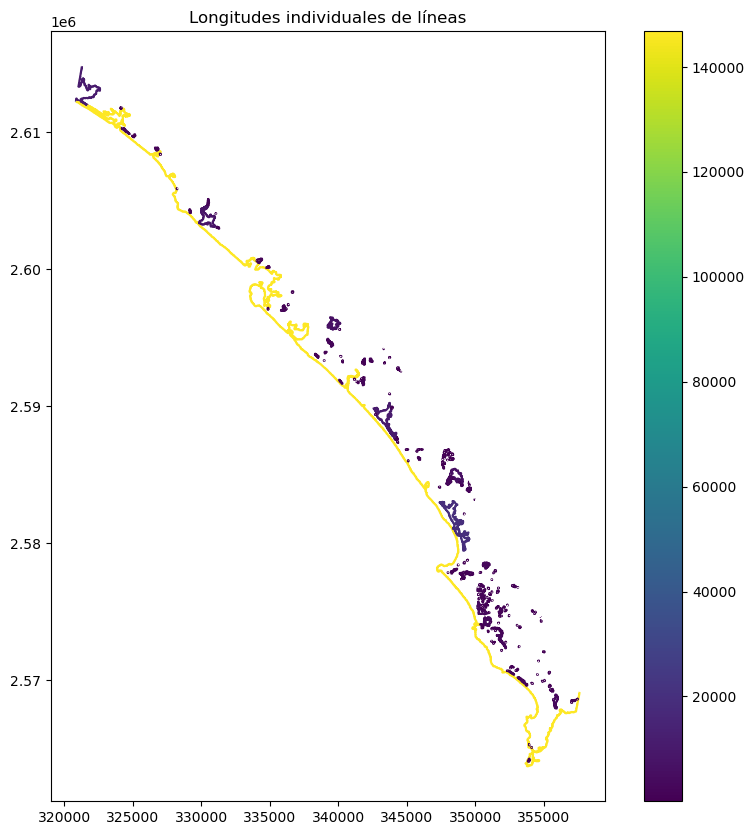

In [6]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Solo haremos la prueba para un archivo
# Selecciona el path de alguno de tus archivos recortados
test_shp_path = r"C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\10_octubre_2022_mz.shp"

# Leer archivo
gdf = gpd.read_file(test_shp_path)

# Explode
exploded = gdf.explode(index_parts=False)

# Agregar columna de longitud
exploded["length_m"] = exploded.length

# Imprimir resumen
print(exploded[["length_m"]].sort_values("length_m", ascending=False))

# Graficar con colores según longitud
exploded.plot(column="length_m", cmap="viridis", legend=True, figsize=(10, 10))
plt.title("Longitudes individuales de líneas")
plt.show()


Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\10_octubre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\11_noviembre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\12_diciembre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\1_enero_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\2_febrero_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\3_marzo_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\4_abril_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\5_mayo_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSO

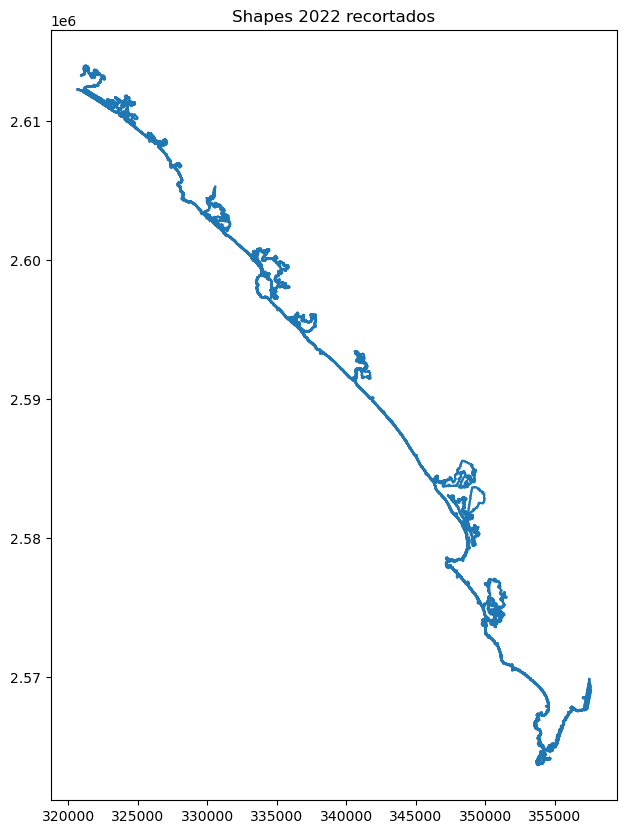

In [ ]:
    import os
    import geopandas as gpd
    import pandas as pd
    import matplotlib.pyplot as plt

    # Directorios base
    base_dir = r'C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes'
    clip_shapefile = os.path.join(base_dir, 'coastlinesh4326.shp')
    input_base = os.path.join(base_dir, '2022shapes', 'input')
    output_base = os.path.join(base_dir, '2022shapes', 'output')

    # Crear carpeta de salida si no existe
    os.makedirs(output_base, exist_ok=True)

    # Leer el shapefile de recorte y reproyectar a 32613
    clip_gdf = gpd.read_file(clip_shapefile).to_crs(epsg=32613)

    # Lista para almacenar resultados
    gdfs_clipped = []

    # Procesar cada subcarpeta
    for subfolder in os.listdir(input_base):
        subfolder_path = os.path.join(input_base, subfolder)
        if os.path.isdir(subfolder_path):
            # Buscar el primer shapefile en la subcarpeta
            shp_files = [f for f in os.listdir(subfolder_path) if f.endswith('.shp')]
            if not shp_files:
                print(f"No se encontró shapefile en {subfolder_path}")
                continue

            shp_path = os.path.join(subfolder_path, shp_files[0])
            gdf = gpd.read_file(shp_path)

            # Reproyectar a 32613
            gdf = gdf.to_crs(epsg=32613)

            # Hacer el clip
            clipped = gpd.overlay(gdf, clip_gdf, how='intersection')

            if not clipped.empty:
                # Separar geometrías individuales
                exploded = clipped.explode(index_parts=False)

                # Filtrar líneas mayores a cierto umbral (en metros)
                exploded = exploded[exploded.length > 20000]

                if not exploded.empty:
                    # Quedarse con la más larga entre las grandes
                    longest_line = exploded.loc[[exploded.length.idxmax()]]

                    # Guardar
                    output_name = f"{subfolder}_2022_mz.shp"
                    output_path = os.path.join(output_base, output_name)
                    longest_line.to_file(output_path)
                    print(f"Guardado: {output_path}")

                    # Acumular para el GeoJSON final
                    gdfs_clipped.append(longest_line)
                else:
                    print(f"Sin líneas suficientemente largas en {subfolder}")
            else:
                print(f"Clip vacío en {subfolder}")

    # Unir todos los recortes
    if gdfs_clipped:
        merged = gpd.GeoDataFrame(pd.concat(gdfs_clipped, ignore_index=True), crs="EPSG:32613")
        output_geojson = os.path.join(output_base, 'shapes_2022_mz.geojson')
        merged.to_file(output_geojson, driver="GeoJSON")
        print(f"GeoJSON final guardado en: {output_geojson}")

        # Visualizar
        merged.plot(figsize=(10,10))
        plt.title("Shapes 2022 recortados")
        plt.show()
    else:
        print("No se generaron recortes.")


Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\10_octubre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\11_noviembre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\12_diciembre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\1_enero_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\2_febrero_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\3_marzo_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\4_abril_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\5_mayo_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSO

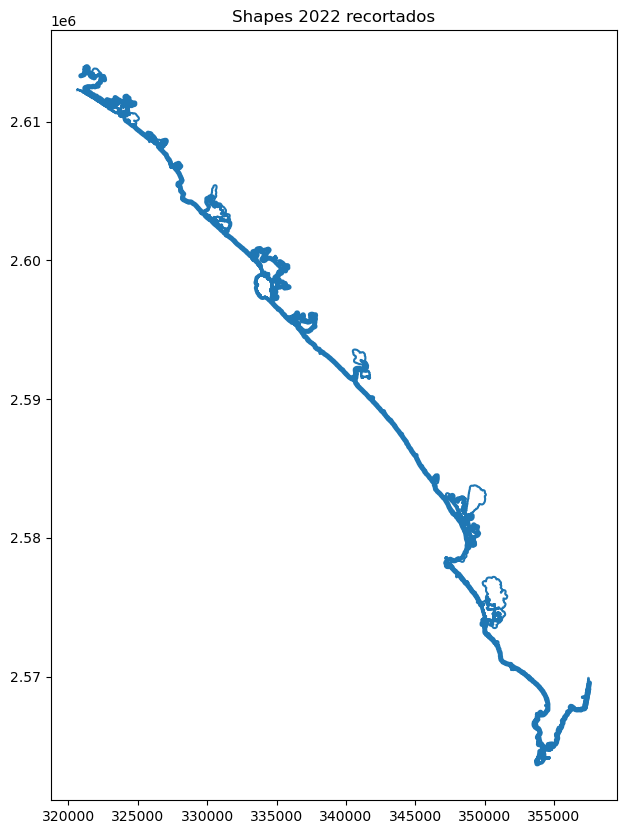

In [27]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.ops import linemerge, unary_union
from shapely.geometry import LineString

# Directorios base
base_dir = r'C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes'
clip_shapefile = os.path.join(base_dir, 'coastlinesh4326.shp')
input_base = os.path.join(base_dir, '2022shapes', 'input')
output_base = os.path.join(base_dir, '2022shapes', 'output')

# Crear carpeta de salida si no existe
os.makedirs(output_base, exist_ok=True)

# Leer el shapefile de recorte y reproyectar a 32613
clip_gdf = gpd.read_file(clip_shapefile).to_crs(epsg=32613)

# Lista para almacenar resultados
gdfs_clipped = []

# Procesar cada subcarpeta
for subfolder in os.listdir(input_base):
    subfolder_path = os.path.join(input_base, subfolder)
    if os.path.isdir(subfolder_path):
        # Buscar el primer shapefile en la subcarpeta
        shp_files = [f for f in os.listdir(subfolder_path) if f.endswith('.shp')]
        if not shp_files:
            print(f"No se encontró shapefile en {subfolder_path}")
            continue

        shp_path = os.path.join(subfolder_path, shp_files[0])
        gdf = gpd.read_file(shp_path)

        # Reproyectar a 32613
        gdf = gdf.to_crs(epsg=32613)

        # Hacer el clip
        clipped = gpd.overlay(gdf, clip_gdf, how='intersection')

        if not clipped.empty:
            # Separar geometrías individuales
            exploded = clipped.explode(index_parts=False)

            # Filtrar líneas mayores a cierto umbral (en metros)
            exploded = exploded[exploded.length > 80000]

            if not exploded.empty:
                try:
                    if len(exploded) > 1:
                        # Hacemos un pequeño buffer para cerrar gaps
                        buffered = exploded.buffer(100)
                        unioned = unary_union(buffered)

                        # Dependiendo del tipo de geometría:
                        if unioned.geom_type == "Polygon":
                            outline = LineString(unioned.exterior)
                        elif unioned.geom_type == "MultiPolygon":
                            largest = max(unioned.geoms, key=lambda p: p.area)
                            outline = LineString(largest.exterior)
                        else:
                            outline = unioned
                    else:
                        outline = exploded.geometry.values[0]

                    # Verificación final antes de aplicar linemerge
                    if isinstance(outline, LineString):
                        merged_line = outline
                    else:
                        merged_line = linemerge(outline)

                    # Si aún queda MultiLineString después de merge, extraemos la más larga
                    if merged_line.geom_type == 'MultiLineString':
                        parts = list(merged_line.geoms)
                        longest_part = max(parts, key=lambda x: x.length)
                        merged_line = longest_part

                    # Guardar el resultado como GeoDataFrame con atributo
                    longest_line = gpd.GeoDataFrame(
                        {'id': [subfolder]},  # atributo adicional
                        geometry=[merged_line],
                        crs="EPSG:32613"
                    )

                    # Guardar shapefile individual
                    output_name = f"{subfolder}_2022_mz.shp"
                    output_path = os.path.join(output_base, output_name)
                    longest_line.to_file(output_path)
                    print(f"Guardado: {output_path}")

                    # Acumular para el GeoJSON final
                    gdfs_clipped.append(longest_line)

                except Exception as e:
                    print(f"Error al unir líneas en {subfolder}: {e}")
            else:
                print(f"Sin líneas suficientemente largas en {subfolder}")
        else:
            print(f"Clip vacío en {subfolder}")

# Unir todos los recortes en un único GeoJSON
if gdfs_clipped:
    merged = gpd.GeoDataFrame(pd.concat(gdfs_clipped, ignore_index=True), crs="EPSG:32613")
    output_geojson = os.path.join(output_base, 'shapes_2022_mz.geojson')
    merged.to_file(output_geojson, driver="GeoJSON")
    print(f"GeoJSON final guardado en: {output_geojson}")

    # Visualizar resultado
    merged.plot(figsize=(10,10))
    plt.title("Shapes 2022 recortados")
    plt.show()
else:
    print("No se generaron recortes.")


Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\10_octubre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\11_noviembre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\12_diciembre_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\1_enero_2022_mz.shp
Guardado: C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes\2022shapes\output\2_febrero_2022_mz.shp
Error al unir líneas en 3_marzo: Cannot linemerge LINESTRING (347100.8021124171 2578132.0976181403, 347096.31231935875 2578140.8352002967, 347092.7015015075 2578149.9711500606, 347090.0045045496 2578159.417302243, 347088.24735547224 2578169.08249809, 347087.44701139367 2578178.8734649983, 347087.61119592114 2578188.6957166283, 347088.73832461506 2578198.454464732, 347090.81752027967 2578208.055533893, 

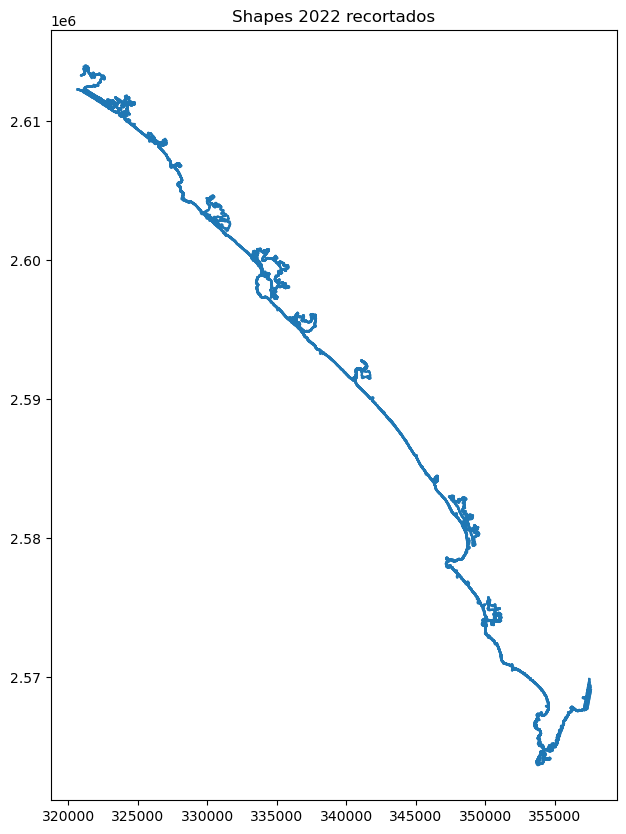

In [28]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.ops import linemerge, unary_union
from shapely.geometry import LineString

# Directorios base
base_dir = r'C:\Users\c4cfo\OneDrive\CENTROGEO-cfoster\1_ENSOCE\C3_Output\shapes'
clip_shapefile = os.path.join(base_dir, 'coastlinesh4326.shp')
input_base = os.path.join(base_dir, '2022shapes', 'input')
output_base = os.path.join(base_dir, '2022shapes', 'output')

# Crear carpeta de salida si no existe
os.makedirs(output_base, exist_ok=True)

# Leer el shapefile de recorte y reproyectar a 32613
clip_gdf = gpd.read_file(clip_shapefile).to_crs(epsg=32613)

# Lista para almacenar resultados
gdfs_clipped = []

# Procesar cada subcarpeta
for subfolder in os.listdir(input_base):
    subfolder_path = os.path.join(input_base, subfolder)
    if os.path.isdir(subfolder_path):
        # Buscar el primer shapefile en la subcarpeta
        shp_files = [f for f in os.listdir(subfolder_path) if f.endswith('.shp')]
        if not shp_files:
            print(f"No se encontró shapefile en {subfolder_path}")
            continue

        shp_path = os.path.join(subfolder_path, shp_files[0])
        gdf = gpd.read_file(shp_path)

        # Reproyectar a 32613
        gdf = gdf.to_crs(epsg=32613)

        # Hacer el clip
        clipped = gpd.overlay(gdf, clip_gdf, how='intersection')

        if not clipped.empty:
            # Separar geometrías individuales
            exploded = clipped.explode(index_parts=False)

            # Filtrar líneas mayores a cierto umbral (en metros)
            exploded = exploded[exploded.length > 80000]

            if not exploded.empty:
                try:
                    if len(exploded) > 1:
                        # Hacemos un pequeño buffer para unir posibles gaps
                        buffered = exploded.buffer(100)
                        unioned = unary_union(buffered)

                        # Dependiendo del tipo de geometría
                        if unioned.geom_type == "Polygon":
                            outline = LineString(unioned.exterior)
                            merged_line = linemerge(outline)
                        elif unioned.geom_type == "MultiPolygon":
                            largest = max(unioned.geoms, key=lambda p: p.area)
                            outline = largest.exterior
                            merged_line = linemerge(outline)
                        else:
                            merged_line = linemerge(unioned)
                    else:
                        merged_line = exploded.geometry.values[0]

                    # Si aún queda MultiLineString después de merge, extraemos la más larga
                    if merged_line.geom_type == 'MultiLineString':
                        parts = list(merged_line.geoms)
                        longest_part = max(parts, key=lambda x: x.length)
                        merged_line = longest_part

                    # Guardar el resultado como GeoDataFrame con atributo
                    longest_line = gpd.GeoDataFrame(
                        {'id': [subfolder]},  # atributo adicional
                        geometry=[merged_line],
                        crs="EPSG:32613"
                    )

                    # Guardar shapefile individual
                    output_name = f"{subfolder}_2022_mz.shp"
                    output_path = os.path.join(output_base, output_name)
                    longest_line.to_file(output_path)
                    print(f"Guardado: {output_path}")

                    # Acumular para el GeoJSON final
                    gdfs_clipped.append(longest_line)

                except Exception as e:
                    print(f"Error al unir líneas en {subfolder}: {e}")
            else:
                print(f"Sin líneas suficientemente largas en {subfolder}")
        else:
            print(f"Clip vacío en {subfolder}")

# Unir todos los recortes en un único GeoJSON
if gdfs_clipped:
    merged = gpd.GeoDataFrame(pd.concat(gdfs_clipped, ignore_index=True), crs="EPSG:32613")
    output_geojson = os.path.join(output_base, 'shapes_2022_mz.geojson')
    merged.to_file(output_geojson, driver="GeoJSON")
    print(f"GeoJSON final guardado en: {output_geojson}")

    # Visualizar resultado
    merged.plot(figsize=(10,10))
    plt.title("Shapes 2022 recortados")
    plt.show()
else:
    print("No se generaron recortes.")


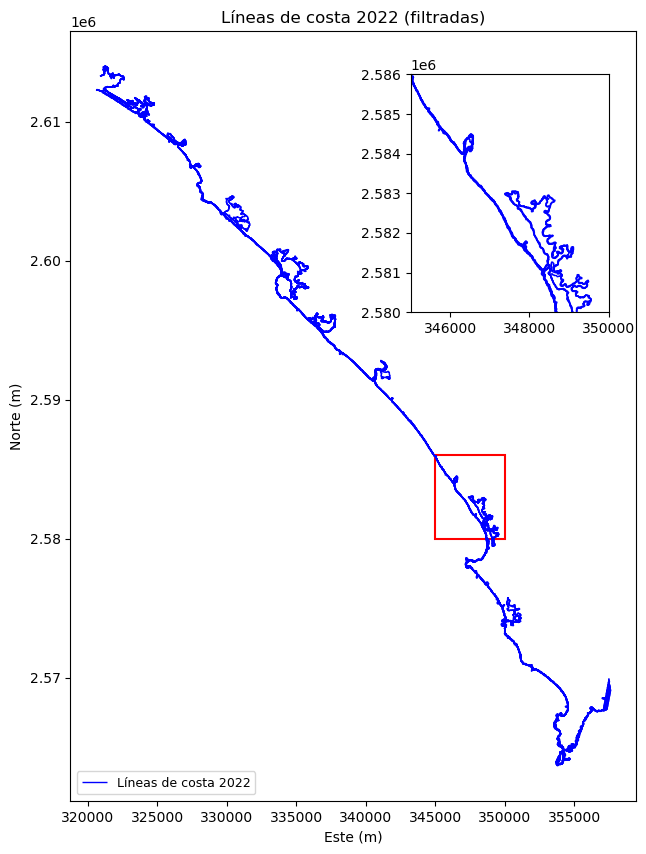

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Cargar el GeoJSON final
geojson_path = os.path.join(output_base, 'shapes_2022_mz.geojson')
gdf = gpd.read_file(geojson_path)
gdf_lines = gdf[gdf.geometry.type.isin(['LineString', 'MultiLineString'])]
fig, ax = plt.subplots(figsize=(12, 10))

# Graficar todas las líneas directamente
gdf_lines.plot(ax=ax, color='blue', linewidth=1)

# Leyenda
ax.legend(['Líneas de costa 2022'], loc='lower left', fontsize=9, frameon=True)

# Título y ejes
ax.set_title("Líneas de costa 2022 (filtradas)")
ax.set_xlabel("Este (m)")
ax.set_ylabel("Norte (m)")

# Inset
axins = inset_axes(ax, width="35%", height="35%", loc='upper right', borderpad=2)
gdf_lines.plot(ax=axins, color='blue', linewidth=1)
axins.set_xlim(345000, 350000)
axins.set_ylim(2580000, 2586000)

# Rectángulo del área de zoom
rect = plt.Rectangle((345000, 2580000), 5000, 6000, linewidth=1.5, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.show()
